In [6]:
%run "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/data_analyse.ipynb"
import classes
import functies

initialised


In [7]:
###bereken de fouten op de verdunningsreeksen
cstock = [60e-6, 0.5e-6, 'N'] #M
Cstock, Vstock, Vadd = sp.symbols('Cstock Vstock Vadd')
cnew = Cstock*Vstock/(Vadd+Vstock)
#verdunning 1
vs1 = [3e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va1 = [57e-3, 0.05e-3, 'U'] #l, gemeten met buret
#verdunning 2
vs2 = [10e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va2 = [90e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf
#verdunning 3
vs3 = [6e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va3 = [34e-3, 0.05e-3, 'U'] #l, gemeten met buret
#verdunning 4
vs4 = [20e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va4 = [80e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf

stockvolumes_matrix = [vs1, vs2, vs3, vs4]
toegevoegde_volumes_matrix = [va1, va2, va3, va4]
print(type(Cstock))
stockvolumes_datapunten = functies.matrix_to_datapunten(stockvolumes_matrix, Cstock)
toegevoegde_volumes_datapunten = functies.matrix_to_datapunten(toegevoegde_volumes_matrix, Vadd)
parameters = [Cstock, Vstock, Vadd]


<class 'sympy.core.symbol.Symbol'>


TypeError: variabele moet een sp.symbol zijn

In [24]:
def lineair(c, param):
    epsiloneff = param[0]
    return epsiloneff*c
def initial_vals(x,y):
    return [1]
concentraties = np.array([3e-6, 6e-6, 9e-6, 12e-6]) #molair
absorbanties = np.array([0.268, 0.557, 0.803, 1.022]) #dimensieloos

fouten = 0.02*absorbanties

absorbantie_onbekend = [1.690, 0.02*1.690, 'U']

In [28]:
#fit het boeltje
parameter = ['epsilon_effectief']
epsilon_fitwaarde = fit(parameter, lineair, initial_vals, concentraties, absorbanties, y_err = fouten)[0]

A, epsilon_eff = sp.symbols('A epsilon_eff')
concentratie_voorschrift = A/epsilon_eff

concentratie_onbekend = data_analyse(concentratie_voorschrift, [A, epsilon_eff], [absorbantie_onbekend, epsilon_fitwaarde])
print(concentratie_onbekend)


Raw output
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.376751712600463
        x: [ 8.897e+04]
      nit: 4
      jac: [ 1.192e-07]
 hess_inv: [[ 3.962e+05]]
     nfev: 26
     njev: 13
[[88087.05582762675, 89857.4694209966]]
epsilon_effectief heeft als waarde: 88972 + 885.15 - 885.26 met 68% betrouwbaarheidsinterval: [88087, 89857] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.024679
De gereduceerde chi^2 waarde is: 3.1256
[1.89946726787898e-5, 2.18506764927525e-7]


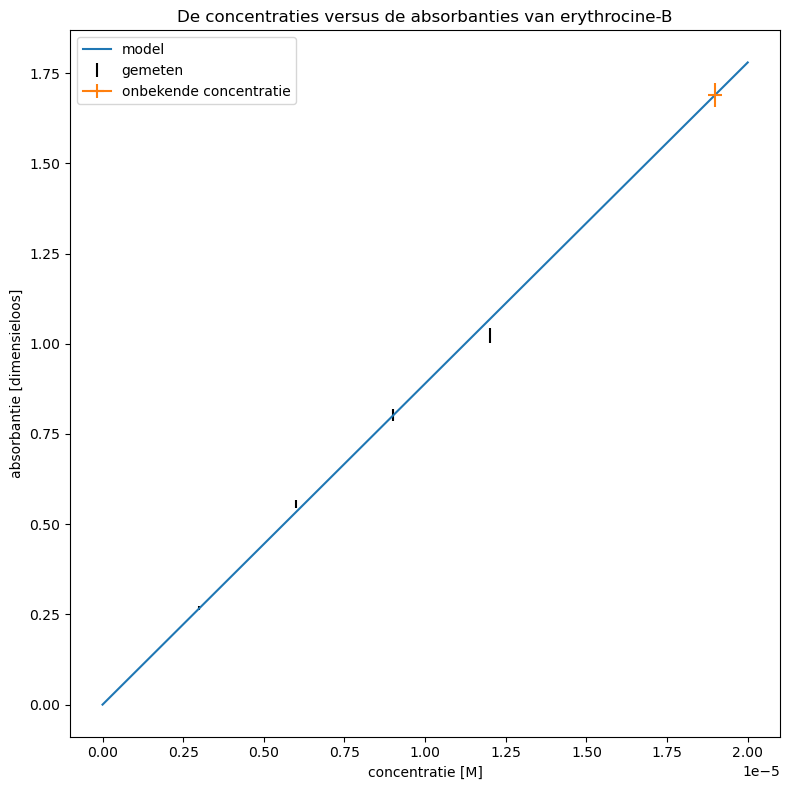

In [32]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

#de gekende punten en de fit
ax.errorbar(concentraties, absorbanties, yerr = fouten, linestyle = ' ', color = 'black', label = 'gemeten')
concentratie_linspace = np.linspace(0,20e-6)
ax.plot(concentratie_linspace, lineair(concentratie_linspace, epsilon_fitwaarde), label = 'model')

#het onbekende punt
ax.errorbar(concentratie_onbekend[0],absorbantie_onbekend[0], yerr = absorbantie_onbekend[1], xerr = concentratie_onbekend[1], label = 'onbekende concentratie')


ax.set_xlabel('concentratie [M]')
ax.set_ylabel('absorbantie [dimensieloos]')
ax.set_title('De concentraties versus de absorbanties van erythrocine-B')
ax.legend()
plt.tight_layout();plt.show()